In [142]:
import pandas as pd 
import pylab as pl 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report

In [144]:
churn_df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv\n")

- LogisticRegression

- confusion_matrix

In [145]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [146]:
churn_df =churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] =churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [147]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [148]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [149]:
# Normalize the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [150]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Model

In [151]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [152]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [153]:
# probabilities of predictions
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.42242662, 0.57757338],
       [0.72446168, 0.27553832],
       [0.65043571, 0.34956429],
       [0.51114797, 0.48885203],
       [0.50365184, 0.49634816]])

## Evaluation

In [154]:
# jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.7058823529411765

In [155]:
# F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.75      0.43      0.55        14

    accuracy                           0.75        40
   macro avg       0.75      0.68      0.69        40
weighted avg       0.75      0.75      0.73        40



In [156]:
# Log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5817876037226268

In [157]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test, yhat)
# cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])

In [158]:
cnf_matrix

array([[24,  2],
       [ 8,  6]], dtype=int64)

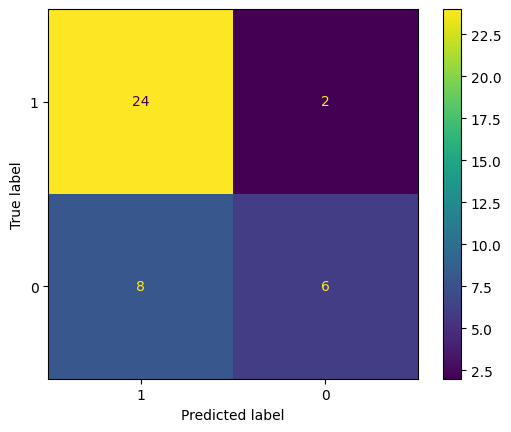

In [159]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[1,0])
# disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=LR.classes_)
disp.plot()

In [160]:
# Veri setini eğitim ve test setlerine bölin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturun
model = LogisticRegression()

Confusion matrix, without normalization
[[26  5]
 [ 3  6]]
Normalized confusion matrix
[[0.83870968 0.16129032]
 [0.33333333 0.66666667]]


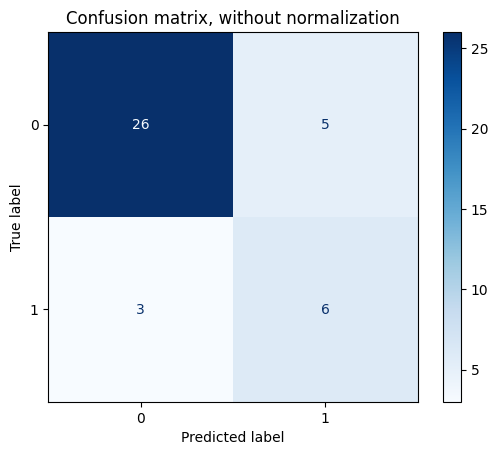

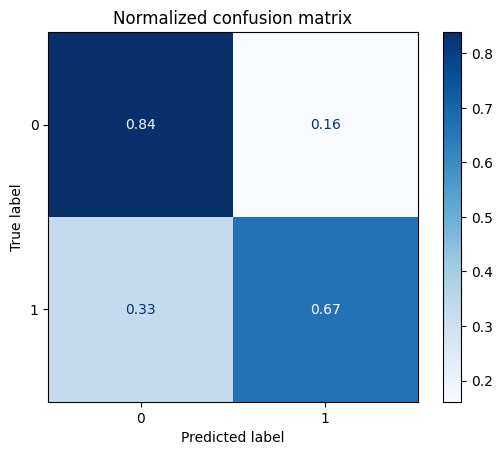

In [161]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        LR,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Model with different solver

In [162]:
LR2 = LogisticRegression(C=0.01, solver="sag").fit(X_train, y_train)
yhat2 = LR2.predict(X_test)
yhat_prob2 = LR2.predict_proba(X_test)

In [163]:
# f1 score for new model
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87        31
           1       0.00      0.00      0.00         9

    accuracy                           0.78        40
   macro avg       0.39      0.50      0.44        40
weighted avg       0.60      0.78      0.68        40



c:\Users\incie\Desktop\Ada_lovelace_academy\.conda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\incie\Desktop\Ada_lovelace_academy\.conda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\incie\Desktop\Ada_lovelace_academy\.conda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [164]:
# log loss for new model
log_loss(y_test, yhat_prob2)

0.46850289204583007

In [165]:
# jaccard index for new model
jaccard_score(y_test, yhat2, pos_label=0)

0.775

- Veriyi temizleyip daha düzgün hale getirirlirse istediğimiz sonuçları daha doğru şekilde elde ederiz. 
Örneğin;
  - istediğimiz değişkenleri inceleyebiliriz hangi değişkenler daha iyi sonuç veriyor diye bakabiliriz
  - int veya float yapılarını inceleyebilir istediğimiz formatta düzeltebiliriz
  - hangi değişkenleri seçmemiz gerekiyor araştırılabilir
  - data normalize edilebilir 
  - kategorik değişkenlerin modeli nasıl etkilediği araştırılabilir